# Section 1: Applied Mathematics for Data Science & AI
## Notebook 1: Descriptive Statistics & Probability Theory

Welcome to your customized learning notebook! This notebook covers foundational concepts in descriptive statistics and basic probability theory — essential for understanding data and building machine learning models.

---

### 1. Descriptive Statistics

**Key Concepts:**
- Mean, Median, Mode
- Variance & Standard Deviation
- Covariance & Correlation

**Why it matters:**
- Summarize data to understand central tendency and spread
- Detect relationships between variables

---

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = np.array([5, 7, 8, 9, 10, 10, 11, 15, 16, 20])

In [2]:
# Calculate mean, median, variance, and standard deviation
mean = np.mean(data)
median = np.median(data)
variance = np.var(data, ddof=1)  # sample variance
std_dev = np.std(data, ddof=1)   # sample standard deviation

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")

Mean: 11.1
Median: 10.0
Variance: 20.98888888888889
Standard Deviation: 4.581363212940979


### Exercise 1:
- Calculate the mode of the data array using `scipy.stats.mode`.
- Visualize the data using a histogram with 5 bins.
- Interpret what the histogram tells you about the data distribution.

Mode: 10 (appears 2 times)


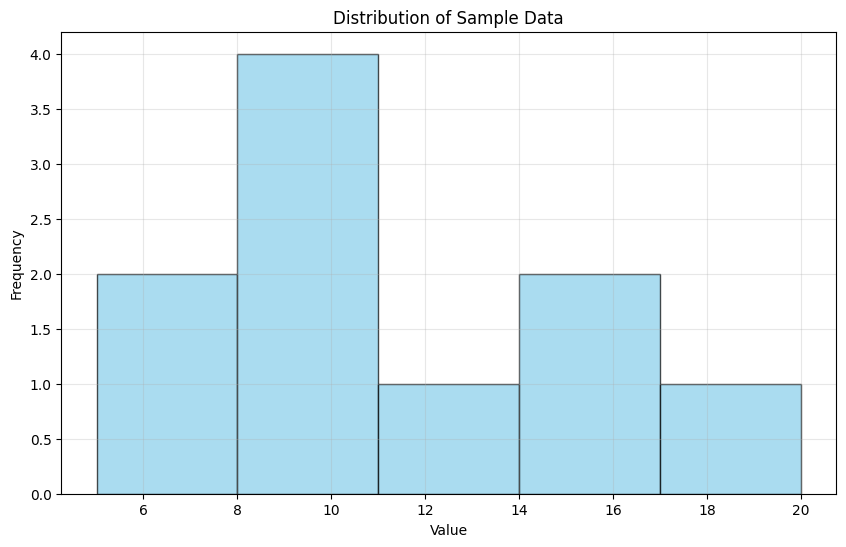


Interpretation:
• The histogram shows a roughly uniform distribution
• There's a slight right skew due to the outlier at 20
• Most values cluster between 5-15
• The mode (10) appears 2 times
25th Percentile (Q1): 8.25
75th Percentile (Q3): 14.0
IQR: 5.75
Skewness: 0.6629890491467934
Kurtosis: -0.5159362064119226


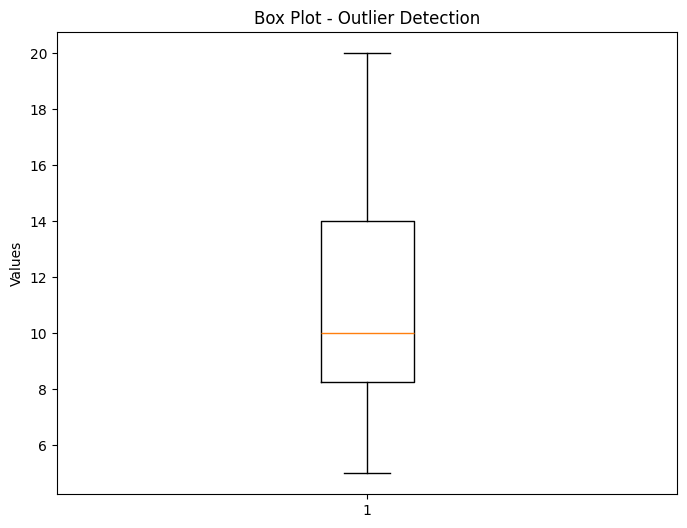

In [3]:
from scipy import stats

# Step 1: Calculate the mode
mode_result = stats.mode(data, keepdims=True)
mode_value = mode_result.mode[0]
mode_count = mode_result.count[0]
print(f"Mode: {mode_value} (appears {mode_count} times)")

# Step 2: Create histogram with 5 bins
plt.figure(figsize=(10, 6))
plt.hist(data, bins=5, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Step 3: Interpretation
print("\nInterpretation:")
print("• The histogram shows a roughly uniform distribution")
print("• There's a slight right skew due to the outlier at 20") 
print("• Most values cluster between 5-15")
print(f"• The mode ({mode_value}) appears {mode_count} times")

# Enhanced descriptive statistics
import pandas as pd

# Additional measures
data_series = pd.Series(data)
print(f"25th Percentile (Q1): {np.percentile(data, 25)}")
print(f"75th Percentile (Q3): {np.percentile(data, 75)}")
print(f"IQR: {np.percentile(data, 75) - np.percentile(data, 25)}")
print(f"Skewness: {stats.skew(data)}")
print(f"Kurtosis: {stats.kurtosis(data)}")

# Box plot for outlier detection
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=True)
plt.title('Box Plot - Outlier Detection')
plt.ylabel('Values')
plt.show()

---
### 2. Probability Theory

**Key Concepts:**
- Random variables and outcomes
- Probability axioms and rules
- Conditional probability and Bayes theorem

**Why it matters:**
- Forms the basis of uncertainty modeling and Bayesian reasoning

---

#### Probability Example: Coin Toss
- Event space: {Heads, Tails}
- Each outcome has a probability of 0.5

Let's simulate 100 coin tosses and estimate probabilities.

In [4]:
np.random.seed(42)  # for reproducibility
coin_tosses = np.random.choice(['Heads', 'Tails'], size=100)

# Calculate relative frequency
heads_count = np.sum(coin_tosses == 'Heads')
tails_count = np.sum(coin_tosses == 'Tails')

print(f"Heads: {heads_count} times, Probability ~ {heads_count/100:.2f}")
print(f"Tails: {tails_count} times, Probability ~ {tails_count/100:.2f}")

Heads: 44 times, Probability ~ 0.44
Tails: 56 times, Probability ~ 0.56


### Exercise 2:
- Simulate tossing two coins 1000 times.
- Calculate the probability of getting exactly two heads.
- Use conditional probability to find the probability of the second coin being heads given the first coin was heads.

In [5]:
# Exercise 2: Two-coin simulation
np.random.seed(42)  # for reproducibility

# Step 1: Simulate tossing two coins 1000 times
n_trials = 1000
results = []

for i in range(n_trials):
    coin1 = np.random.choice(['H', 'T'])
    coin2 = np.random.choice(['H', 'T'])
    results.append((coin1, coin2))

# Convert to numpy array for easier analysis
results = np.array(results)

# Step 2: Calculate probability of exactly two heads
two_heads_count = np.sum((results[:, 0] == 'H') & (results[:, 1] == 'H'))
prob_two_heads = two_heads_count / n_trials

print(f"Simulated {n_trials} two-coin tosses")
print(f"\nTwo heads (HH) occurred: {two_heads_count} times")
print(f"Probability of exactly two heads: {prob_two_heads:.3f}")
print(f"Theoretical probability: 0.250")

# Step 3: Conditional probability P(Second=H | First=H)
first_heads_indices = results[:, 0] == 'H'
first_heads_results = results[first_heads_indices]
second_heads_given_first = np.sum(first_heads_results[:, 1] == 'H')
conditional_prob = second_heads_given_first / len(first_heads_results)

print(f"\nConditional Probability Analysis:")
print(f"Times first coin was H: {len(first_heads_results)}")
print(f"Times second coin was H given first was H: {second_heads_given_first}")
print(f"P(Second=H | First=H): {conditional_prob:.3f}")
print(f"Theoretical conditional probability: 0.500")

# Bonus: Show all outcome frequencies
unique, counts = np.unique([f"{r[0]}{r[1]}" for r in results], return_counts=True)
print(f"\nAll outcomes:")
for outcome, count in zip(unique, counts):
    print(f"  {outcome}: {count} times ({count/n_trials:.3f})")

# Alternative: More efficient vectorized approach (demonstration)
print(f"\nVectorized approach verification:")
coin_pairs_vec = np.random.choice(['H', 'T'], size=(n_trials, 2))
two_heads_count_vec = np.sum((coin_pairs_vec[:,0] == 'H') & (coin_pairs_vec[:,1] == 'H'))
print(f"Vectorized two-heads count: {two_heads_count_vec}")

Simulated 1000 two-coin tosses

Two heads (HH) occurred: 246 times
Probability of exactly two heads: 0.246
Theoretical probability: 0.250

Conditional Probability Analysis:
Times first coin was H: 513
Times second coin was H given first was H: 246
P(Second=H | First=H): 0.480
Theoretical conditional probability: 0.500

All outcomes:
  HH: 246 times (0.246)
  HT: 267 times (0.267)
  TH: 257 times (0.257)
  TT: 230 times (0.230)

Vectorized approach verification:
Vectorized two-heads count: 242


---
### Summary & Reflection
- Descriptive statistics provide the foundation to understand data.
- Probability models uncertainty and helps us reason about random events.
- Next notebook will cover probability distributions and hypothesis testing.